In [13]:
import pandas as pd
import scipy as sp
from scipy.stats import norm

import numpy as np
import statsmodels.api as sm
from PyAstronomy import pyasl
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_rows = 2000

matplotlib.rcParams['figure.figsize'] = (40.0, 4.0)
matplotlib.style.use('ggplot')

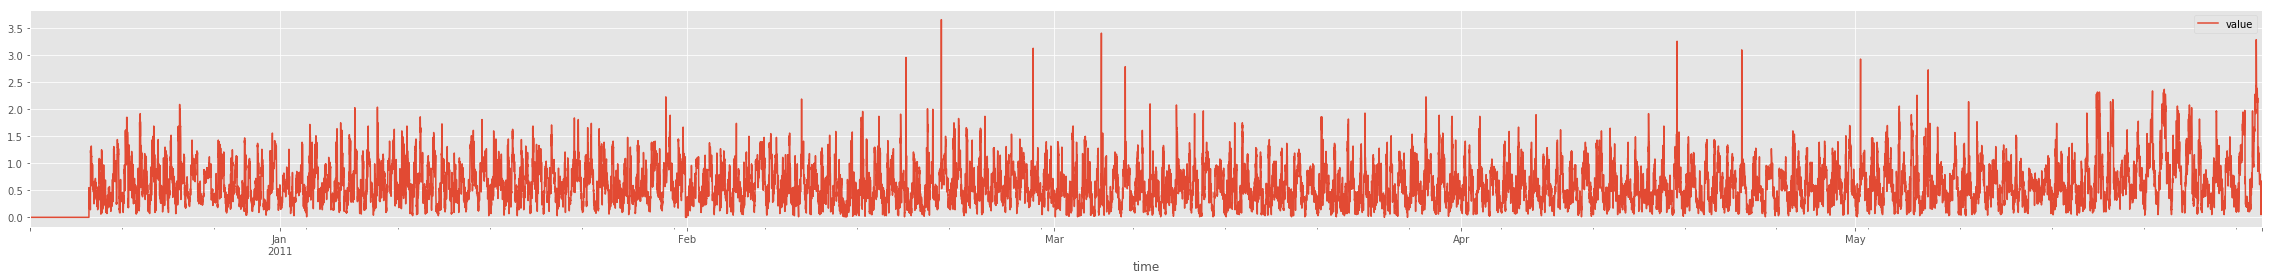

In [24]:
#fd = '~/git/NAB/data/realTweets/Twitter_volume_GOOG.csv'
#fd = 'C:/Users/p0p/Desktop/anaomaly/occupancy_t4013.csv.. Example-3.csv'
fd = 'C:/Users/p0p/Desktop/anaomaly/2.csv'
df = pd.read_csv(fd)
#df = df['2015-04-10':]
df['time'] = pd.to_datetime(df.time)
df= df.set_index('time')
ax = df.plot()
j = 0

#ax.get_figure().savefig('raw_signal.pdf', format='pdf')

In [25]:
df.describe()

,value
count,24480.000000
mean,0.599682
std,0.392889
min,0.000000
25%,0.310000
50%,0.530000
75%,0.840000
max,3.660000


In [26]:
df.head(5)

,value
time,
2010-12-13 00:00:00,0.0
2010-12-13 00:10:00,0.0
2010-12-13 00:20:00,0.0
2010-12-13 00:30:00,0.0
2010-12-13 00:40:00,0.0


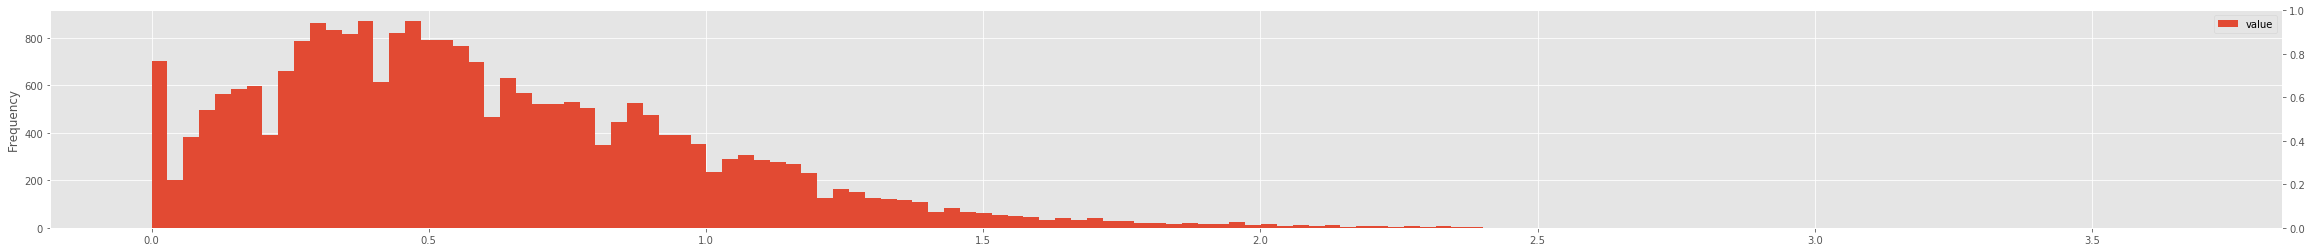

In [27]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax2.grid(False)
df.plot.hist( stacked=True, bins=128, ax=ax1 )

#xmin,xmax,ymin,ymax=plt.axis()
#x_axis = np.arange(xmin, xmax, 0.5)
#plt.plot(x_axis, norm.pdf(x_axis,df.mean(),df.std()),color='blue')
#fig.savefig('raw_signal_dist.pdf', format='pdf')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, complex))


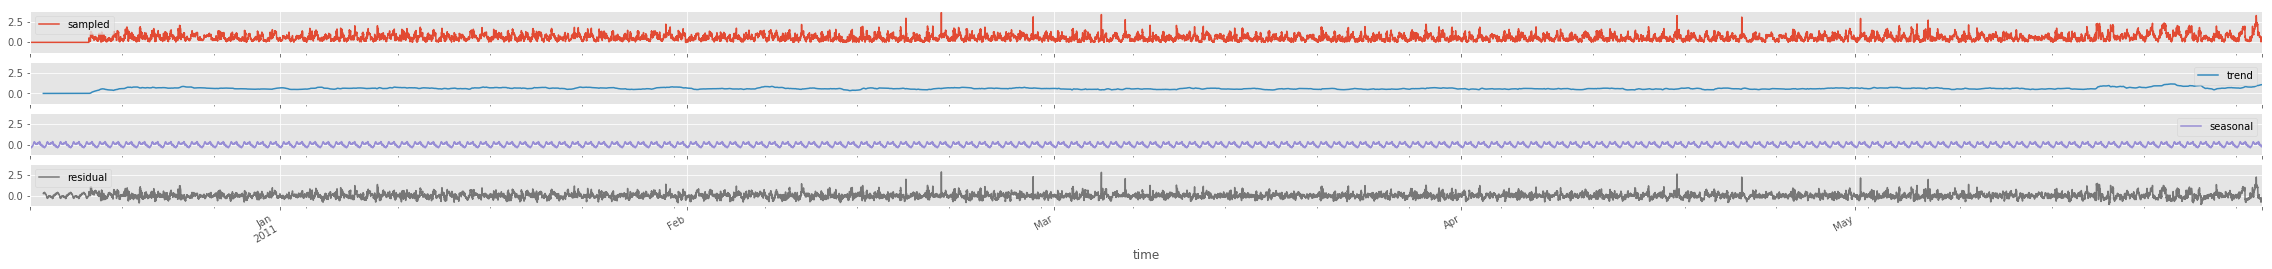

In [18]:
n_sample = 144
sf= df
res = sm.tsa.seasonal_decompose(sf, two_sided=False, freq=n_sample)
rf = pd.concat([sf, res.trend, res.seasonal, res.resid], axis=1)
rf.columns = ['sampled', 'trend', 'seasonal', 'residual']
ax = rf.plot(subplots=True,sharey=True)
#ax[0].get_figure().savefig('decomposed_signal.pdf', format='pdf')

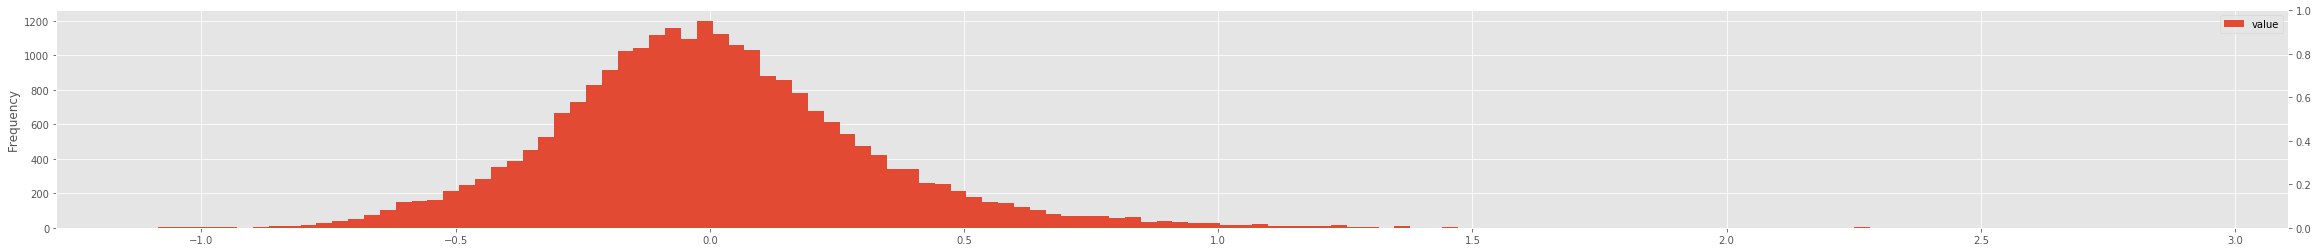

In [19]:
sf = res.resid
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax2.grid(False)
sf.plot.hist( stacked=True, bins=128, ax=ax1 )

#xmin,xmax,ymin,ymax=plt.axis()
#x_axis = np.arange(xmin, xmax, 0.5)
#plt.plot(x_axis, norm.pdf(x_axis,sf.mean(),sf.std()),color='blue')
#fig.savefig('residual_dist.pdf', format='pdf')

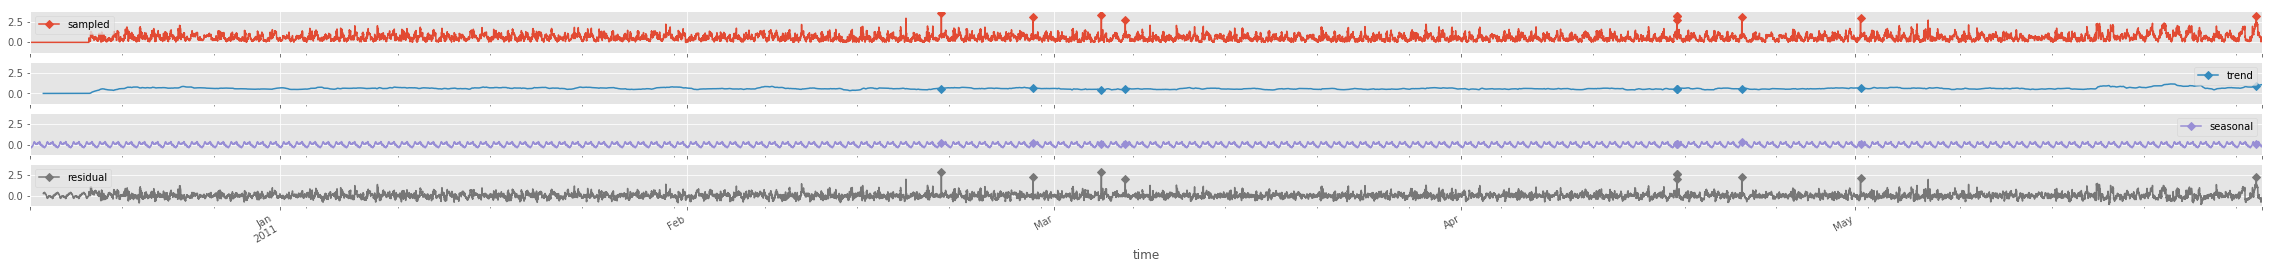

In [20]:
arr = rf['residual'][n_sample:]
nos, anomalies = pyasl.generalizedESD(arr, 10, 0.05, fullOutput=False)
mark = [x+n_sample for x in anomalies]
ax = rf.plot( subplots=True, sharey=True, marker='D', markevery=mark )
#ax[0].get_figure().savefig('marked_anomalies.pdf', format='pdf')

In [21]:
mark.sort()
print( nos, mark )
rf.iloc[mark]

10 [9993, 11000, 11748, 12010, 18060, 18061, 18062, 18771, 20074, 24414]


,sampled,trend,seasonal,residual
time,,,,
2011-02-20 09:30:00,3.66,0.600590,0.153883,2.905527
2011-02-27 09:20:00,3.13,0.647951,0.154953,2.327095
2011-03-04 14:00:00,3.41,0.442813,0.112798,2.854390
2011-03-06 09:40:00,2.79,0.580590,0.119615,2.089795
2011-04-17 10:00:00,3.21,0.531250,0.083682,2.595068
2011-04-17 10:10:00,2.70,0.540174,0.061072,2.098754
2011-04-17 10:20:00,3.26,0.550035,0.075207,2.634758
2011-04-22 08:30:00,3.10,0.552500,0.279442,2.268058
2011-05-01 09:40:00,2.93,0.647083,0.119615,2.163302


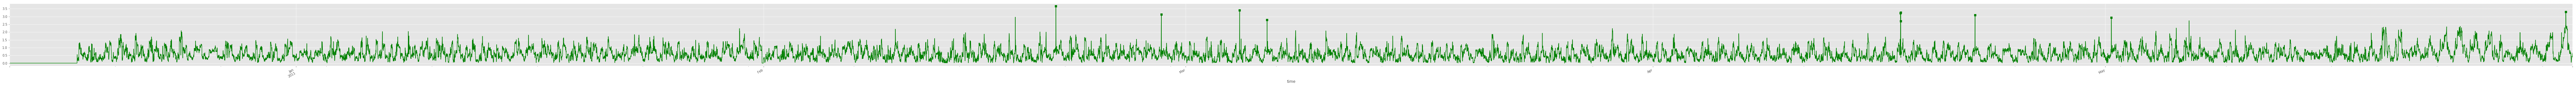

In [22]:
mark = [x+n_sample for x in anomalies]
ax = df.value.plot( subplots=True, sharey=True, marker='s', markevery=mark, figsize=(144, 4) , color='g')

In [11]:
# from __future__ import print_function, division
# from PyAstronomy import pyasl
# import numpy as np
# import matplotlib.pylab as plt

# x = np.arange(df['value'].values.size)
# y = df['value'].values


# iin, iout = pyasl.slidingPolyResOutlier(x, y, 20, deg=4, stdlim=3.0, controlPlot=True)


# print("Number of outliers: ", len(iout))
# print("Indices of outliers: ", iout)


# xnew, ynew = x[iin], y[iin]

# plt.plot(x, y, 'r.')
# plt.plot(xnew, ynew, 'bp')
# plt.show()